In [112]:
from __future__ import absolute_import, division, print_function

In [113]:
%matplotlib inline 

import numpy as np
import matplotlib.pyplot as plt

In [114]:
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets("../mnist-data/", one_hot=True)

Extracting ../mnist-data/train-images-idx3-ubyte.gz
Extracting ../mnist-data/train-labels-idx1-ubyte.gz
Extracting ../mnist-data/t10k-images-idx3-ubyte.gz
Extracting ../mnist-data/t10k-labels-idx1-ubyte.gz


In [115]:
mnist.train.images.shape

(55000, 784)

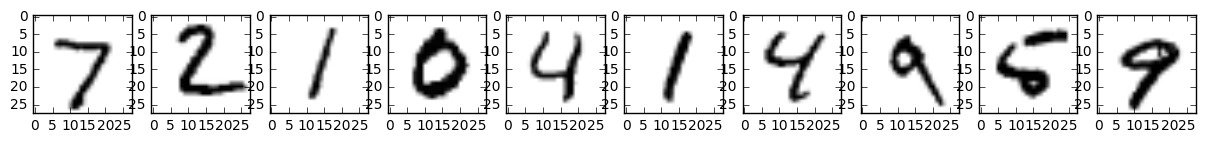

In [116]:
plt.figure(figsize=(15,5))
for i in list(range(10)):
    plt.subplot(1, 10, i+1)
    pixels = mnist.test.images[i]
    pixels = pixels.reshape((28, 28))
    plt.imshow(pixels, cmap='gray_r')
plt.show()

In [1]:
from keras.models import Model
from keras.layers import Input, Dense, Activation
from keras.layers import Dropout, Flatten, Reshape
from keras.layers import Convolution2D, MaxPooling2D
from keras.layers import BatchNormalization

Using TensorFlow backend.


In [2]:
from  functools import reduce

def print_layers(model):
    for l in model.layers:
        print(l.name, l.output_shape, [reduce(lambda x, y: x*y, w.shape) for w in l.get_weights()])

In [185]:
def mlp(batch_normalization=False, activation='sigmoid'):
    _in = Input(shape=(784,))
    
    for i in range(5):
        x = Dense(128, activation=activation, input_shape=(784,))(x if i else _in)
        if batch_normalization:
            x = BatchNormalization()(x)

    _out = Dense(10, activation='softmax')(x)
    model = Model(_in, _out)

    return model

In [186]:
from keras.callbacks import Callback

class BatchLogger(Callback):
    def on_train_begin(self, epoch, logs={}):
        self.log_values = {}
        for k in self.params['metrics']:
            self.log_values[k] = []

    def on_batch_end(self, batch, logs={}):
        for k in self.params['metrics']:
            if k in logs:
                self.log_values[k].append(logs[k])

### Sigmoid activation function

In [204]:
# see http://cs231n.github.io/neural-networks-3/

model = mlp(False, 'sigmoid')
print_layers(model)

bl_noBN = BatchLogger()

from keras.optimizers import Adam
model.compile(loss='categorical_crossentropy', optimizer=Adam(lr=0.001), metrics=["accuracy"])

model.fit(mnist.train.images, mnist.train.labels,
          batch_size=128, nb_epoch=1, verbose=1, callbacks=[bl_noBN],
          validation_data=(mnist.test.images, mnist.test.labels))

input_49 (None, 784) []
dense_279 (None, 128) [100352, 128]
dense_280 (None, 128) [16384, 128]
dense_281 (None, 128) [16384, 128]
dense_282 (None, 128) [16384, 128]
dense_283 (None, 128) [16384, 128]
dense_284 (None, 10) [1280, 10]
Train on 55000 samples, validate on 10000 samples
Epoch 1/1
55000/55000 [==============================] - 6s - loss: 1.2411 - acc: 0.5816 - val_loss: 0.5352 - val_acc: 0.8669


In [205]:
# see http://cs231n.github.io/neural-networks-3/

model = mlp(True, 'sigmoid')
print_layers(model)

bl_BN = BatchLogger()

from keras.optimizers import Adam
model.compile(loss='categorical_crossentropy', optimizer=Adam(lr=0.001), metrics=["accuracy"])

model.fit(mnist.train.images, mnist.train.labels,
          batch_size=128, nb_epoch=1, verbose=1, callbacks=[bl_BN],
          validation_data=(mnist.test.images, mnist.test.labels))

input_50 (None, 784) []
dense_285 (None, 128) [100352, 128]
batchnormalization_111 (None, 128) [128, 128, 128, 128]
dense_286 (None, 128) [16384, 128]
batchnormalization_112 (None, 128) [128, 128, 128, 128]
dense_287 (None, 128) [16384, 128]
batchnormalization_113 (None, 128) [128, 128, 128, 128]
dense_288 (None, 128) [16384, 128]
batchnormalization_114 (None, 128) [128, 128, 128, 128]
dense_289 (None, 128) [16384, 128]
batchnormalization_115 (None, 128) [128, 128, 128, 128]
dense_290 (None, 10) [1280, 10]
Train on 55000 samples, validate on 10000 samples
Epoch 1/1
55000/55000 [==============================] - 10s - loss: 0.3081 - acc: 0.9079 - val_loss: 0.1827 - val_acc: 0.9441


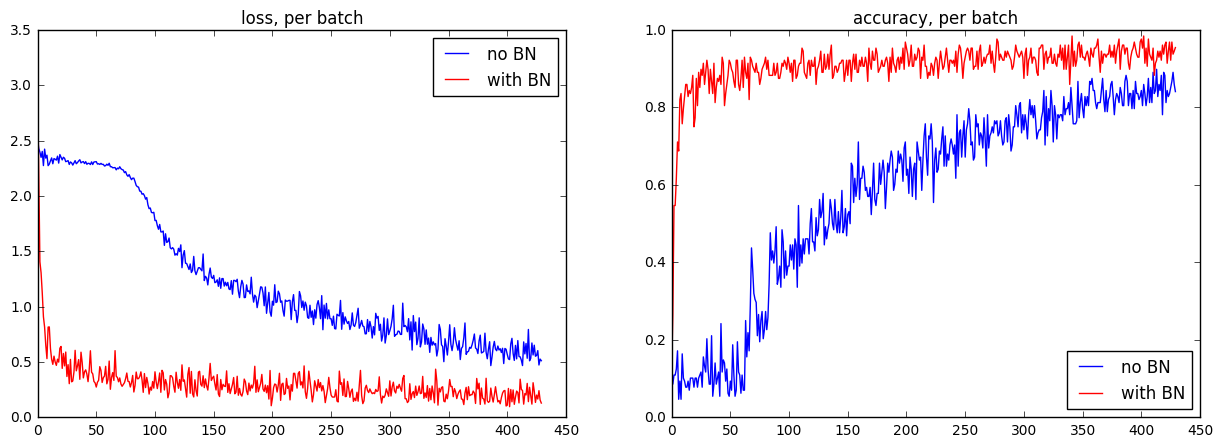

In [206]:
plt.figure(figsize=(15,5))
plt.subplot(1, 2, 1)
plt.title('loss, per batch')
plt.plot(bl_noBN.log_values['loss'], 'b-', label='no BN');
plt.plot(bl_BN.log_values['loss'], 'r-', label='with BN');
plt.legend(loc='upper right')
plt.subplot(1, 2, 2)
plt.title('accuracy, per batch')
plt.plot(bl_noBN.log_values['acc'], 'b-', label='no BN');
plt.plot(bl_BN.log_values['acc'], 'r-', label='with BN');
plt.legend(loc='lower right')
plt.show()

### Relu activation function

In [207]:
# see http://cs231n.github.io/neural-networks-3/

model = mlp(False, 'relu')
print_layers(model)

bl_noBN = BatchLogger()

from keras.optimizers import Adam
model.compile(loss='categorical_crossentropy', optimizer=Adam(lr=0.001), metrics=["accuracy"])

model.fit(mnist.train.images, mnist.train.labels,
          batch_size=128, nb_epoch=1, verbose=1, callbacks=[bl_noBN],
          validation_data=(mnist.test.images, mnist.test.labels))

input_51 (None, 784) []
dense_291 (None, 128) [100352, 128]
dense_292 (None, 128) [16384, 128]
dense_293 (None, 128) [16384, 128]
dense_294 (None, 128) [16384, 128]
dense_295 (None, 128) [16384, 128]
dense_296 (None, 10) [1280, 10]
Train on 55000 samples, validate on 10000 samples
Epoch 1/1
55000/55000 [==============================] - 6s - loss: 0.3415 - acc: 0.8957 - val_loss: 0.1482 - val_acc: 0.9534


In [208]:
# see http://cs231n.github.io/neural-networks-3/

model = mlp(True, 'relu')
print_layers(model)

bl_BN = BatchLogger()

from keras.optimizers import Adam
model.compile(loss='categorical_crossentropy', optimizer=Adam(lr=0.001), metrics=["accuracy"])

model.fit(mnist.train.images, mnist.train.labels,
          batch_size=128, nb_epoch=1, verbose=1, callbacks=[bl_BN],
          validation_data=(mnist.test.images, mnist.test.labels))

input_52 (None, 784) []
dense_297 (None, 128) [100352, 128]
batchnormalization_116 (None, 128) [128, 128, 128, 128]
dense_298 (None, 128) [16384, 128]
batchnormalization_117 (None, 128) [128, 128, 128, 128]
dense_299 (None, 128) [16384, 128]
batchnormalization_118 (None, 128) [128, 128, 128, 128]
dense_300 (None, 128) [16384, 128]
batchnormalization_119 (None, 128) [128, 128, 128, 128]
dense_301 (None, 128) [16384, 128]
batchnormalization_120 (None, 128) [128, 128, 128, 128]
dense_302 (None, 10) [1280, 10]
Train on 55000 samples, validate on 10000 samples
Epoch 1/1
55000/55000 [==============================] - 10s - loss: 0.2982 - acc: 0.9088 - val_loss: 0.1391 - val_acc: 0.9568


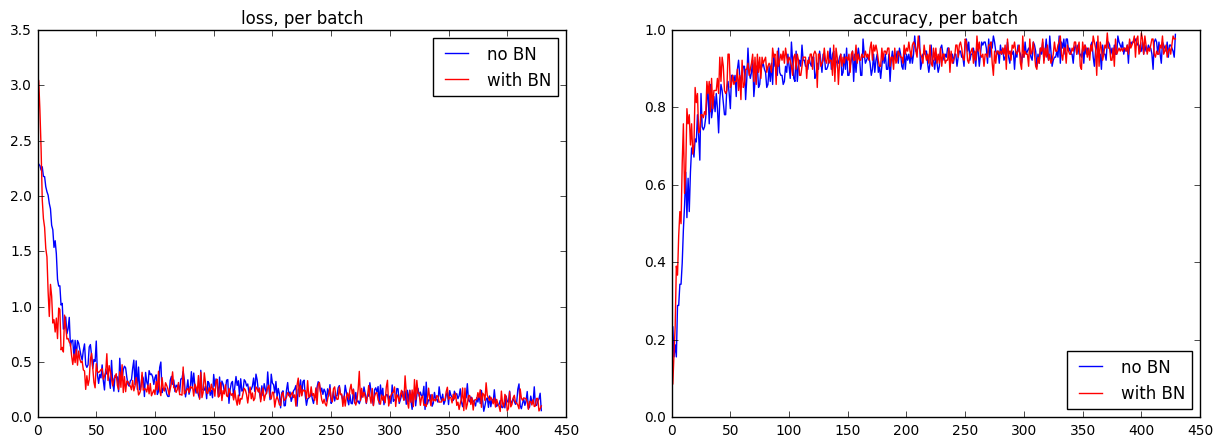

In [209]:
plt.figure(figsize=(15,5))
plt.subplot(1, 2, 1)
plt.title('loss, per batch')
plt.plot(bl_noBN.log_values['loss'], 'b-', label='no BN');
plt.plot(bl_BN.log_values['loss'], 'r-', label='with BN');
plt.legend(loc='upper right')
plt.subplot(1, 2, 2)
plt.title('accuracy, per batch')
plt.plot(bl_noBN.log_values['acc'], 'b-', label='no BN');
plt.plot(bl_BN.log_values['acc'], 'r-', label='with BN');
plt.legend(loc='lower right')
plt.show()